In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns # stylize the matplot output
sns.set_style('white') # beautify the charts output

# 作业
Python编程：学生成绩数据的处理和基本分析
- 有60名学生的两个课程成绩的数据文件(文件名：`ReportCard1.txt，ReportCard2.txt`) 分别记录着学生的学号、性别以及不同课程的成绩。请将数据读入Pandas数据框，并做如下预处理和基本分析：

### 将两个数据文件按学号合并为一个数据文件，得到包含所有课程成绩的数据文件

In [2]:
df = pd.concat([
    pd.read_csv(f"data/ReportCard{sn}.txt", delimiter='\t', index_col='xh') 
    for sn in range(1, 3)
], axis=1)

df['sex'] = df.sex.astype(int) # convert sex number as integer
print(df.shape)
df.head()

(60, 9)


,sex,poli,chi,math,fore,phy,che,geo,his
xh,,,,,,,,,
92103,2,NaN,NaN,NaN,66.0,98.0,79.0,89.0,81.0
92239,2,40.0,63.0,44.0,21.0,54.0,26.0,26.0,55.0
92142,2,NaN,70.0,59.0,22.0,68.0,26.0,26.0,63.0
92223,1,56.0,91.0,65.5,68.0,77.0,39.0,54.5,63.0
92144,1,59.0,79.0,34.0,34.0,57.0,37.0,37.0,76.0


### 计算每个同学的各门课程的总成绩和平均成绩
> 由于有missing values, 这里总成绩和平均成绩均不计算无成绩学科

In [3]:
subjects = df.columns[1:] # subjects title
print(subjects)
df['total'] = df[subjects].sum(axis=1)
df['average'] = df[subjects].mean(axis=1)
df.tail()

Index(['poli', 'chi', 'math', 'fore', 'phy', 'che', 'geo', 'his'], dtype='object')


,sex,poli,chi,math,fore,phy,che,geo,his,total,average
xh,,,,,,,,,,,
92208,1,91.0,88.0,63.0,48.0,75.0,54.0,76.0,95.0,590.0,73.7500
92135,1,91.0,77.0,47.0,44.0,58.0,44.0,62.0,80.0,503.0,62.8750
92110,1,92.0,94.0,71.0,65.0,78.0,62.0,83.0,87.0,632.0,79.0000
92102,1,94.0,97.0,86.5,61.0,93.0,64.0,79.5,95.0,670.0,83.7500
92101,2,96.0,96.0,87.5,72.0,93.0,65.0,76.0,92.0,677.5,84.6875


 ### 将数据按总成绩的降序排序

In [4]:
df = df.sort_values(by='total', ascending=False)
df.head()

,sex,poli,chi,math,fore,phy,che,geo,his,total,average
xh,,,,,,,,,,,
92101,2,96.0,96.0,87.5,72.0,93.0,65.0,76.0,92.0,677.5,84.6875
92202,1,78.0,89.0,83.5,81.0,91.0,77.0,81.0,93.0,673.5,84.1875
92102,1,94.0,97.0,86.5,61.0,93.0,64.0,79.5,95.0,670.0,83.7500
92104,2,89.0,97.0,69.5,86.0,83.0,62.0,83.0,94.0,663.5,82.9375
92203,2,74.0,93.0,84.5,50.0,89.0,72.0,82.5,92.0,637.0,79.6250


### 按性别分别计算各门课程的平均成绩

In [5]:
df.groupby('sex')[subjects].mean()

,poli,chi,math,fore,phy,che,geo,his
sex,,,,,,,,
1,78.866667,83.500000,60.033333,51.200000,72.733333,52.366667,62.533333,78.933333
2,80.464286,83.051724,62.344828,48.633333,77.666667,55.800000,67.950000,78.433333


# 按优、良、中、及格和不及格，对平均成绩进行分组

In [6]:
# method 1
df['category'] = '不及格'
df.loc[df.average>=60, 'category'] = '及格'
df.loc[df.average>=70, 'category'] = '中'
df.loc[df.average>=80, 'category'] = '良'
df.loc[df.average>=90, 'category'] = '优'
df.category.value_counts()

中      24
及格     22
不及格     9
良       5
Name: category, dtype: int64

In [7]:
# method 2
pd.cut(
    x=df.average, 
    bins=[0, 60, 70, 80, 90, np.inf], 
    labels=['不及格', '及格', '中', '良', '优']
).value_counts()

及格     23
中      23
不及格     9
良       5
优       0
Name: average, dtype: int64

In [8]:
# 按性别统计优、良、中、及格和不及格的人数
# method 1
df.pivot_table(
    index='sex', columns='category', values='total',
    aggfunc='count', margins=True
)

category,不及格,中,及格,良,All
sex,,,,,
1,5,11,12,2,30
2,4,13,10,3,30
All,9,24,22,5,60


In [9]:
# method 2
for sex in df.sex.unique():
    print(f"sex: {sex}\n", df[df.sex==sex].category.value_counts())

sex: 2
 中      13
及格     10
不及格     4
良       3
Name: category, dtype: int64
sex: 1
 及格     12
中      11
不及格     5
良       2
Name: category, dtype: int64


### 生成性别的虚拟自变量

In [10]:
df.join(pd.get_dummies(df.sex, prefix="sex_")).head()

,sex,poli,chi,math,fore,phy,che,geo,his,total,average,category,sex__1,sex__2
xh,,,,,,,,,,,,,,
92101,2,96.0,96.0,87.5,72.0,93.0,65.0,76.0,92.0,677.5,84.6875,良,0,1
92202,1,78.0,89.0,83.5,81.0,91.0,77.0,81.0,93.0,673.5,84.1875,良,1,0
92102,1,94.0,97.0,86.5,61.0,93.0,64.0,79.5,95.0,670.0,83.7500,良,1,0
92104,2,89.0,97.0,69.5,86.0,83.0,62.0,83.0,94.0,663.5,82.9375,良,0,1
92203,2,74.0,93.0,84.5,50.0,89.0,72.0,82.5,92.0,637.0,79.6250,中,0,1


 ### 学生成绩数据的图形化展示：对包含所有课程成绩的数据文件，做如下图形化展示：

#### 绘制总成绩的直方图

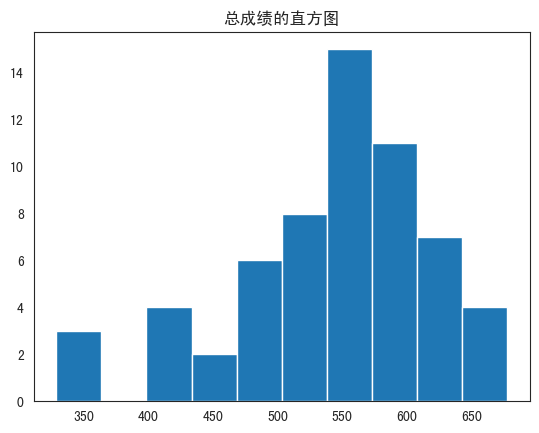

In [11]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.hist(df.total)
plt.title('总成绩的直方图')
plt.show()

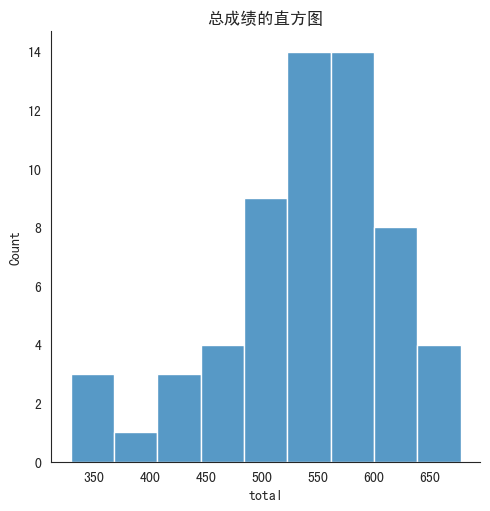

In [12]:
# seaborn histogram
plt.rcParams['font.sans-serif']=['SimHei']
sns.displot(data=df, x='total' )
plt.title('总成绩的直方图')
plt.show()

#### 绘制平均成绩的优、良、中、及格和不及格的饼图

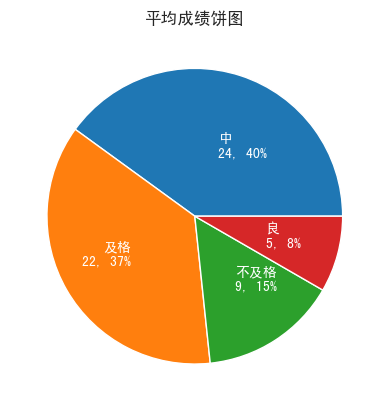

In [16]:
plt.rcParams['font.sans-serif']=['SimHei']

counts = df.category.value_counts()
names = counts.index
percents = counts / counts.sum()
lables = [f"{n}\n{c}, {p:.0%}" for n, c, p in zip(names, counts, percents)]
plt.pie(counts, labels=lables, labeldistance=0.5, textprops=dict(color="w"))
plt.title('平均成绩饼图')
plt.show()

#### 绘制总成绩和数学成绩(math)的散点图

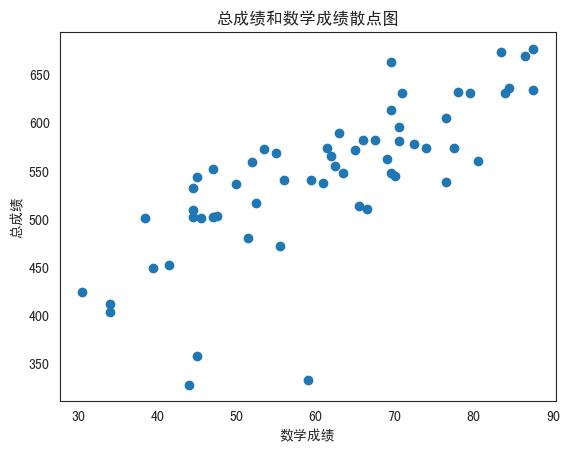

In [14]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.scatter(x=df.math, y=df.total)
plt.xlabel('数学成绩')
plt.ylabel('总成绩')
plt.title('总成绩和数学成绩散点图')
plt.show()